In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [5]:
data = pd.read_csv('../input/heart-disease-uci/heart.csv')

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
numeric_features = ['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']

eda_df = data.loc[:, numeric_features].copy()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

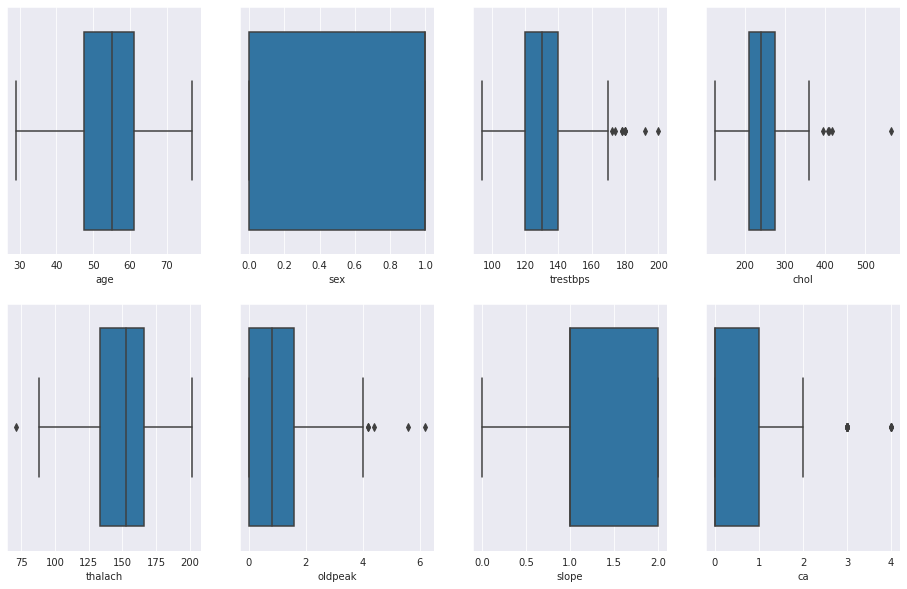

In [9]:
plt.figure(figsize=(16, 10))

for i in range(len(eda_df.columns)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(eda_df[eda_df.columns[i]])

plt.show()

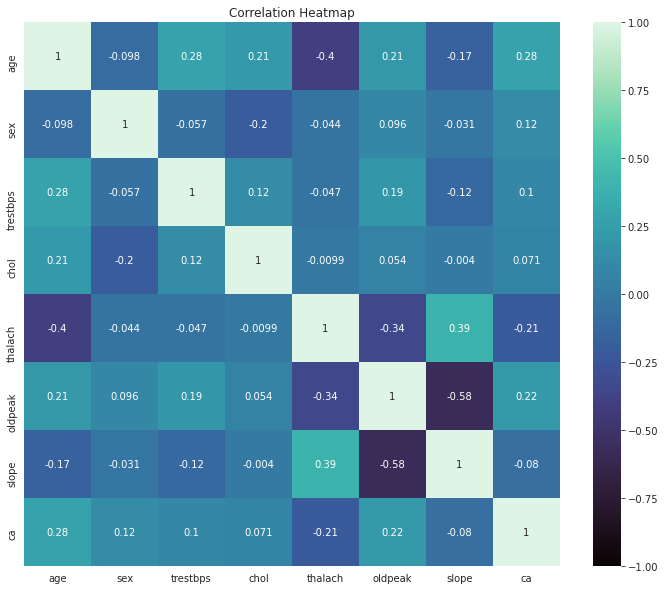

In [10]:
corr = eda_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

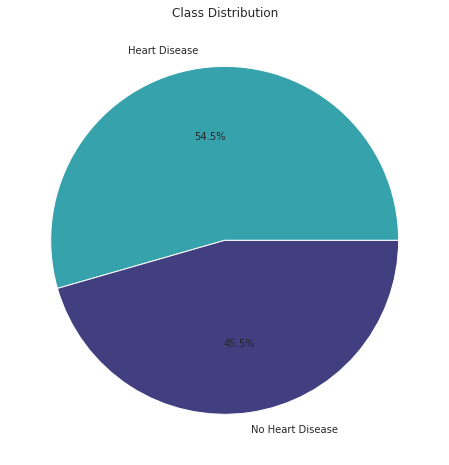

In [12]:
#We can also visualize the class distribution with a pie chart.
plt.figure(figsize=(8, 8))
plt.pie(data['target'].value_counts(), labels=["Heart Disease", "No Heart Disease"], autopct='%.1f%%', colors=['#36a2ac', '#413f80'])
plt.title("Class Distribution")
plt.show()

# Preprocessing

In [13]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [14]:
def preprocess_inputs(df, scaler):
    df = df.copy()
    
    # One-hot encode the nominal features
    nominal_features = ['cp', 'slope', 'thal']
    df = onehot_encode(df, dict(zip(nominal_features, ['CP', 'SL', 'TH'])))
    
    # Split df into X and y
    y = df['target'].copy()
    X = df.drop('target', axis=1).copy()
    
    # Scale X
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X, y

In [15]:
X, y = preprocess_inputs(data, RobustScaler())

In [17]:
X

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,CP_1,CP_2,CP_3,SL_0,SL_1,SL_2,TH_0,TH_1,TH_2,TH_3
0,0.592593,0.0,0.75,-0.110236,1.0,-1.0,-0.092308,0.0,0.9375,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-1.0,0.0
1,-1.333333,0.0,0.00,0.157480,0.0,0.0,1.046154,0.0,1.6875,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.037037,-1.0,0.00,-0.566929,0.0,-1.0,0.584615,0.0,0.3750,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.074074,0.0,-0.50,-0.062992,0.0,0.0,0.769231,0.0,0.0000,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.148148,-1.0,-0.50,1.795276,0.0,0.0,0.307692,1.0,-0.1250,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,-1.0,0.50,0.015748,0.0,0.0,-0.923077,1.0,-0.3750,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0
299,-0.740741,0.0,-1.00,0.377953,0.0,0.0,-0.646154,0.0,0.2500,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0
300,0.962963,0.0,0.70,-0.740157,1.0,0.0,-0.369231,0.0,1.6250,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0
301,0.148148,0.0,0.00,-1.716535,0.0,0.0,-1.169231,1.0,0.2500,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0


# Training

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [19]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

print("Logistic Regression Accuracy: {:.2f}%".format(lr_model.score(X_test, y_test) * 100))

Logistic Regression Accuracy: 86.89%


In [20]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

print("Support Vector Machine Accuracy: {:.2f}%".format(svm_model.score(X_test, y_test) * 100))

Support Vector Machine Accuracy: 88.52%


In [21]:
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)

print("Neural Network Accuracy: {:.2f}%".format(nn_model.score(X_test, y_test) * 100))

Neural Network Accuracy: 88.52%


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
